In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#import seaborn as sns

import pandas as pd
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
#from imblearn.over_sampling import SMOTE  #for principal component analysis, I think? 

from sklearn.model_selection import train_test_split

from collections import defaultdict
import math
from random import seed
from random import random

%matplotlib inline


In /home/scott/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/scott/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/scott/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/scott/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/scott/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
#traindatafeatures= pd.read_csv("train-features_scottannotated.csv")
#ftdata= pd.read_csv("forcetorquebuttonresults_9-12-2021.csv")
#ftdata= pd.read_csv("forcetorquebuttonresults_09_21_2021.csv")
ftdata= pd.read_csv("forcetorquebuttonresults_unnormalized_09_21_2021.csv")


ftdata
ftdata_transposed = ftdata.T

IndexError: single positional indexer is out-of-bounds

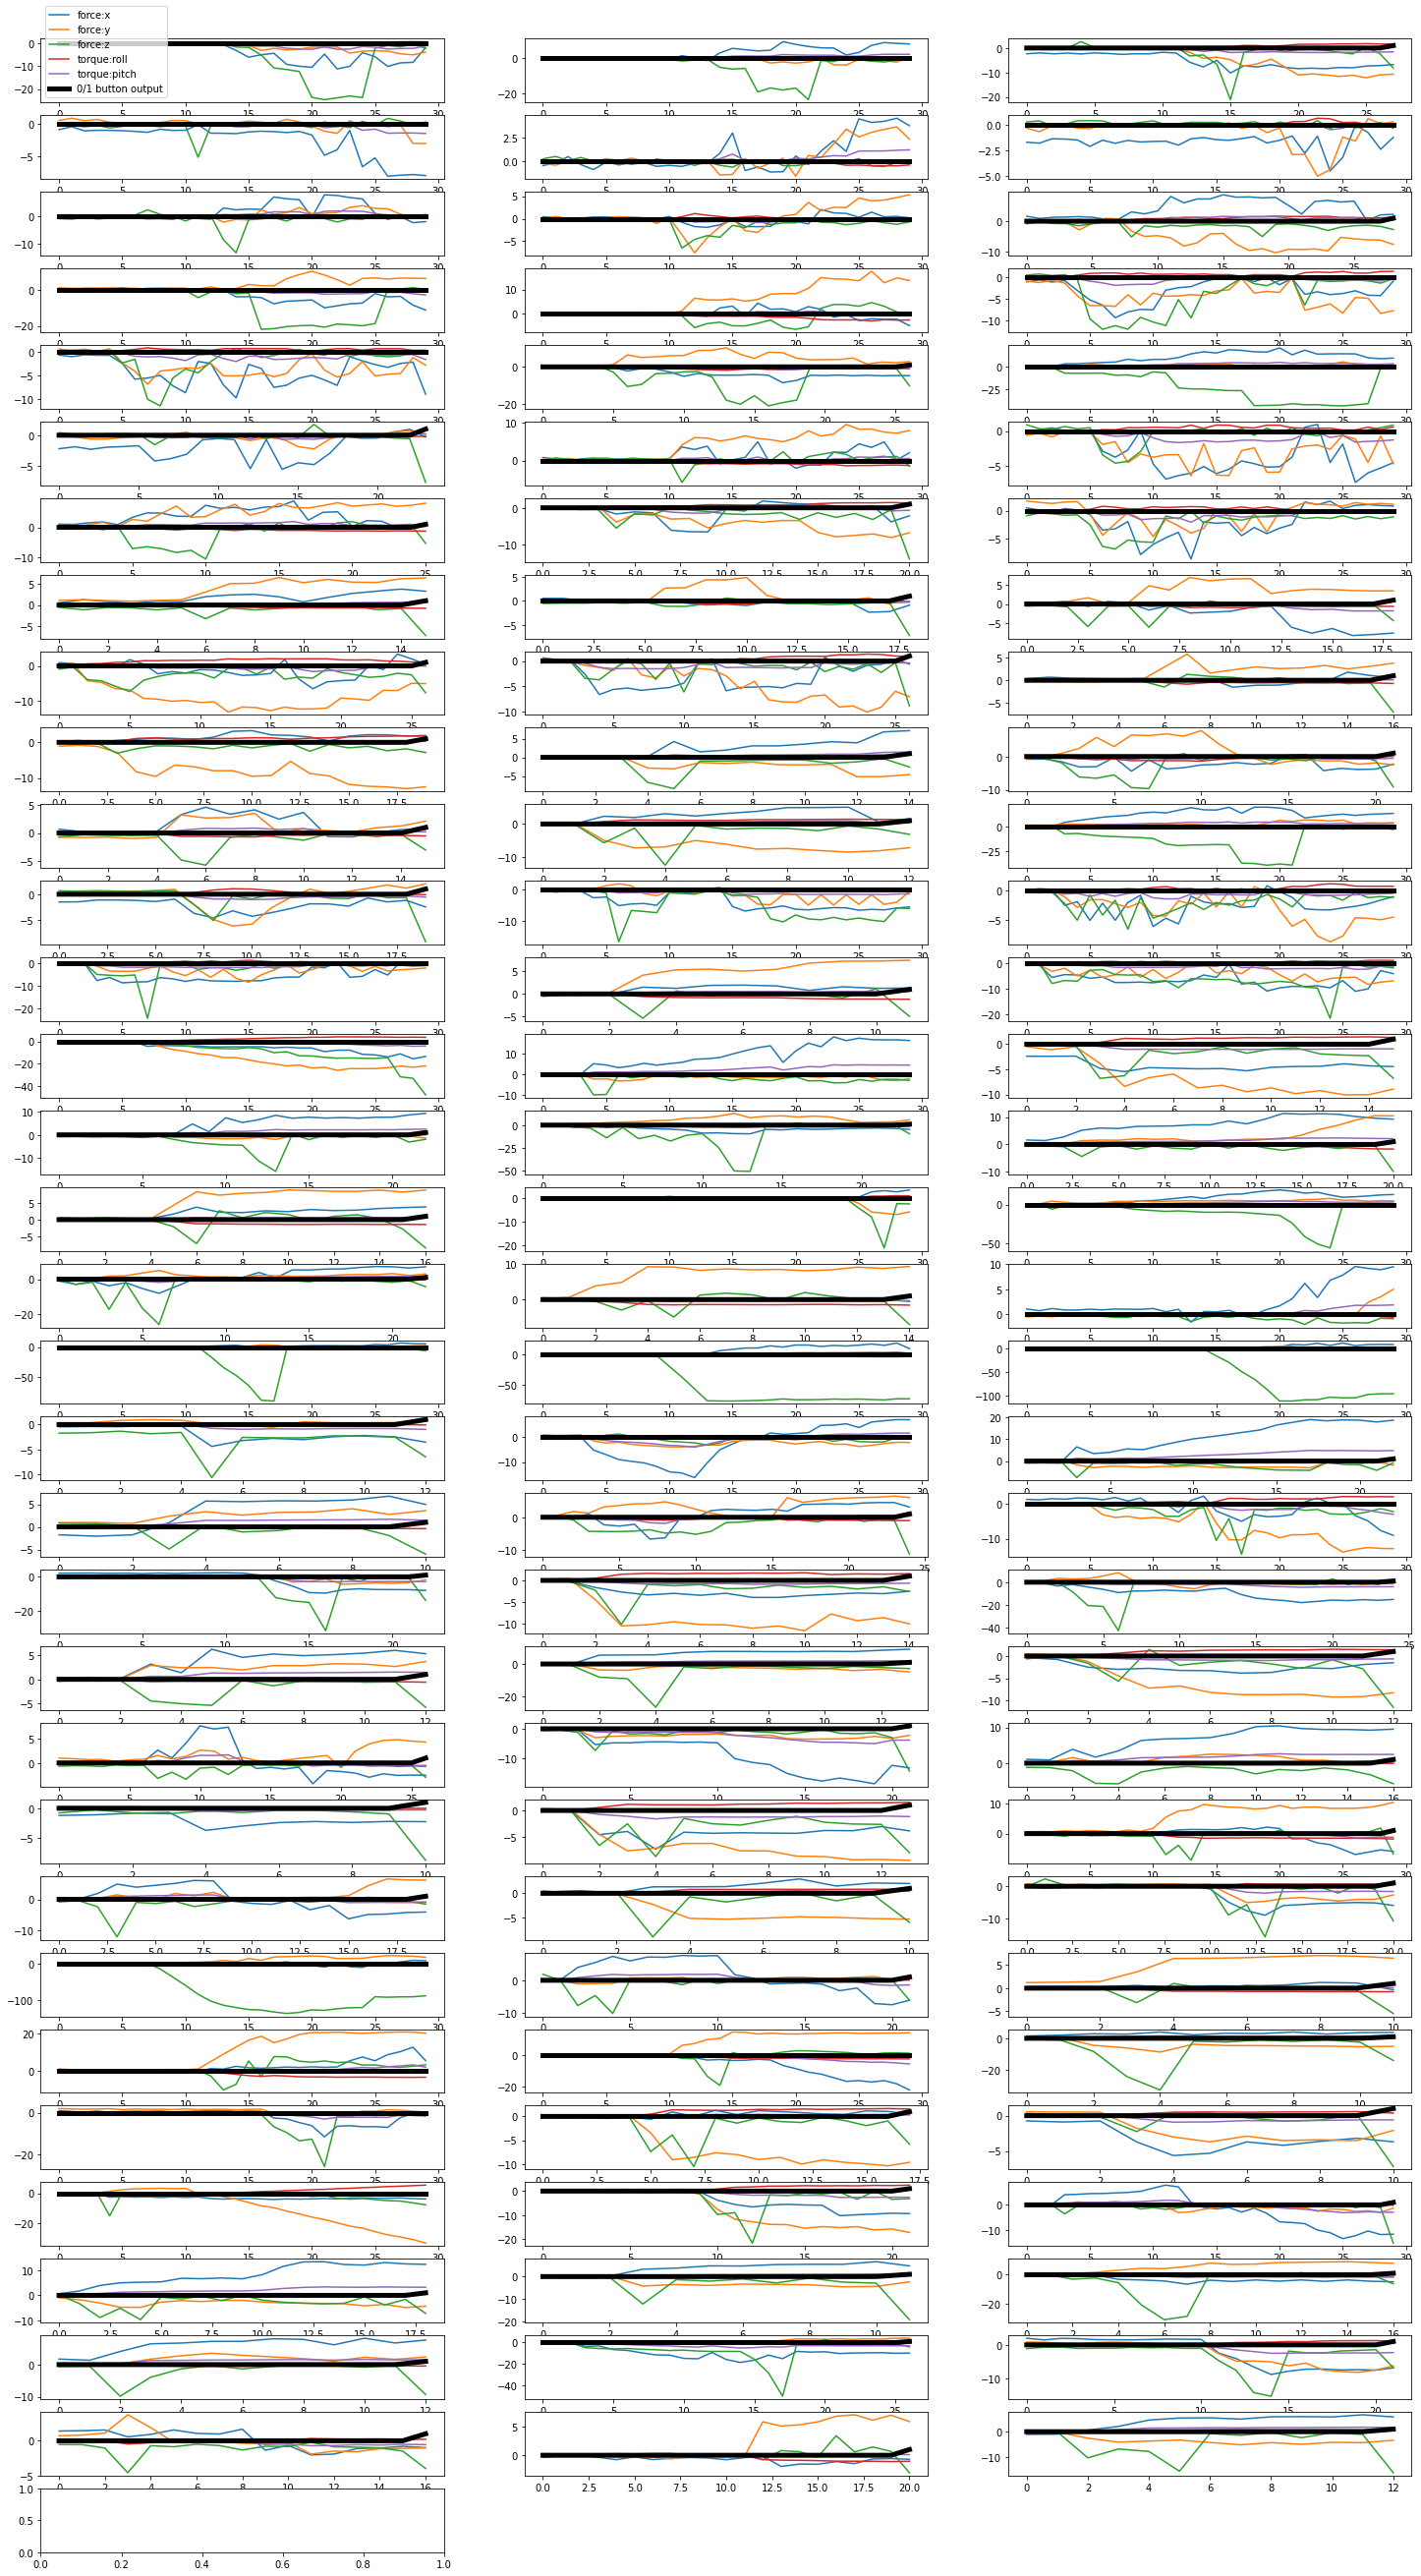

In [3]:
#ftdata['header1'].plot()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#fig, axes = plt.subplots(nrows=1, ncols=5)

#ftdata[0:6]
fig = plt.figure(figsize=(25, 80))
fignum=82*2
for i in range(fignum):

    ax = fig.add_subplot(28*2,3,i+1)
 
    row0=ftdata.iloc[0+(6*i)]
    row1=ftdata.iloc[1+(6*i)]
    row2=ftdata.iloc[2+(6*i)]
    row3=ftdata.iloc[3+(6*i)]
    row4=ftdata.iloc[4+(6*i)]
    row5=ftdata.iloc[5+(6*i)]

    #figure(figsize=(4, *), dpi=80)
    ax.plot(range(30),row0, label="force:x")
    ax.plot(range(30),row1, label="force:y")
    ax.plot(range(30),row2, label="force:z")
    ax.plot(range(30),row3, label="torque:roll")
    ax.plot(range(30),row4, label="torque:pitch")
    ax.plot(range(30),row5, color='black',label="0/1 button output",linewidth=5.0)
    
    
    if i==0 or i==fignum-1:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels,loc='lower left')

#ax.legend(handles, labels)


plt.show()
    #row5.plot()



In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [8]:

model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.


model.add(layers.Embedding(input_dim=30, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#https://towardsdatascience.com/lstm-by-example-using-tensorflow-feb0c1968537

#https://www.tensorflow.org/guide/basic_training_loops

# Define a training loop
epochs = range(10)
# Collect the history of W-values and b-values to plot later
Ws, bs = [], []

def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))


def training_loop(model, x, y):

  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    # Track this before I update
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# Do the training
training_loop(model, x, y)


In [12]:
 np.random.random((3, 2,5)) 


array([[[0.8043778 , 0.92489599, 0.85129768, 0.03537969, 0.33482943],
        [0.23666001, 0.08076078, 0.19394293, 0.21242946, 0.66497414]],

       [[0.97409302, 0.53710668, 0.39004423, 0.81622023, 0.6456988 ],
        [0.04978617, 0.61847953, 0.8958257 , 0.48297349, 0.08054494]],

       [[0.81286981, 0.82477903, 0.97601563, 0.98021914, 0.30400883],
        [0.78462651, 0.58238918, 0.08573984, 0.31295826, 0.91178923]]])